Datos de la clase
==============

Los datos del ejericio vistos en clase:


<img src="https://raw.githubusercontent.com/mrivas/disenoExperimentos/master/datos.png" alt="Drawing" style="width: 700px;" />

Pueden ser escritos como un matriz en numpy

In [11]:
import numpy as np

data=np.array([[575,542,530,539,570],
               [565,593,590,579,610],
               [600,651,610,637,629],
               [725,700,715,685,710]])

In [34]:
# Operaciones útiles
a,n = data.shape # Esto es útil para determinar el número de niveles y replicados
y_barra   = data.mean() # Útil para calcular el promedio global
y_barra_i = data.mean(axis=1) # Útil para calcular el promedio de cada nivel (y_barra_i)

In [25]:
# Primera fila
data[0,0:5]
# Segunda columna
data[0:4,1]

array([542, 593, 651, 700])

Gráfico de la distribución F
===========================

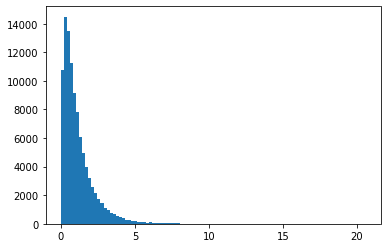

In [40]:
x=np.random.f(3,16,100000)
from matplotlib import pyplot as plt
plt.hist(x,bins=100)
plt.show()

Ejercicios
==========

Hacer:

1. Los gráficos de caja (boxplots, ver taller 1) de las velocidades de grabación a distintos niveles de potencia.
2. Los cálculos para determina $F_0$
3. Graficar la distribución $F$ con $\alpha-1$ y $N-\alpha$ grados de libertad.  
4. Superponer el valor de $F_0$ en la gráfica anterior.

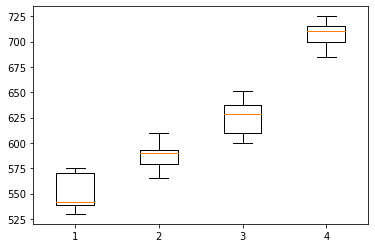

In [32]:
#Parte 1: Grafico de caja
plt.boxplot(np.transpose(data))
plt.show()

In [39]:
# Parte 2: Hacer cálculos para calcular F0
a,n = data.shape # Esto es útil para determinar el número de niveles y replicados
y_barra   = data.mean() # Útil para calcular el promedio global
y_barra_i = data.mean(axis=1) # Útil para calcular el promedio de cada nivel (y_barra_i)

SSe,SStrat = 0,0
for i in range(a): # va entre 1(0) y a(a-1)
    for j in range(n): # va entre 1 (0) y n (n-1)
        SSe    += np.power( data[i,j] - y_barra_i[i]  ,2)
        SStrat += np.power( y_barra_i[i] - y_barra ,2)
print(SSe,SStrat)
MSe    = SSe/(n*a-a) # Estimador de la varianza dentro de los tratamientos
MStrat = SStrat/(a-1)# Estimador de la varinza entre los tratamientos
print(MSe,MStrat)
F0 = MStrat/MSe
print(F0)

5339.199999999999 66870.54999999997
333.69999999999993 22290.183333333323
66.79707321945858


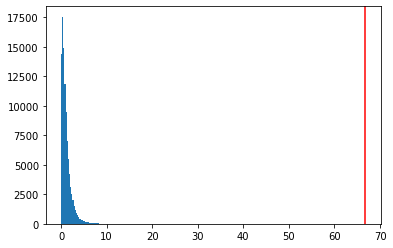

In [46]:
# Parte 3
x=np.random.f(a-1,n*a-a,100000)
plt.hist(x,bins=100)
# Parte 4
plt.axvline(F0,color="red")
plt.show()